# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gembu
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | darwin
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | whakatane
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | sao jose da coroa grande
Processing Record 10 of Set 1 | kailua-kona
Processing Record 11 of Set 1 | beira
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | sinop
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gembu,6.7000,11.2667,64.63,95,100,3.09,NG,1723461810
1,yellowknife,62.4560,-114.3525,68.41,74,100,6.91,CA,1723461811
2,margaret river,-33.9500,115.0667,59.34,57,95,19.08,AU,1723461813
3,darwin,-12.4611,130.8418,76.98,61,0,5.75,AU,1723461814
4,bilibino,68.0546,166.4372,47.91,76,61,5.37,RU,1723461815


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gembu,6.7000,11.2667,64.63,95,100,3.09,NG,1723461810
1,yellowknife,62.4560,-114.3525,68.41,74,100,6.91,CA,1723461811
2,margaret river,-33.9500,115.0667,59.34,57,95,19.08,AU,1723461813
3,darwin,-12.4611,130.8418,76.98,61,0,5.75,AU,1723461814
4,bilibino,68.0546,166.4372,47.91,76,61,5.37,RU,1723461815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

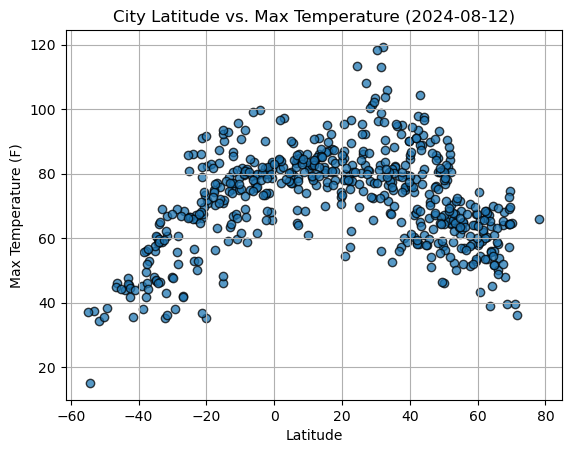

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

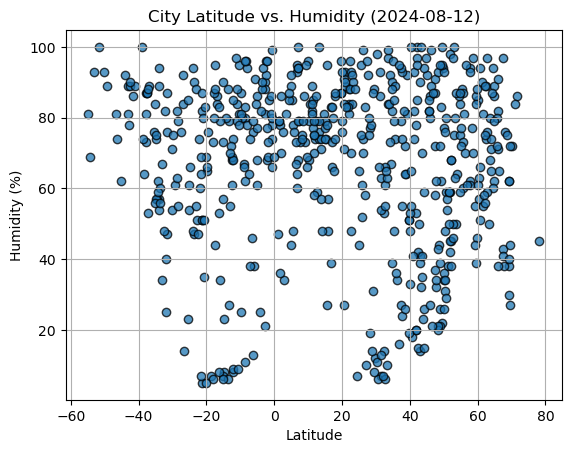

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

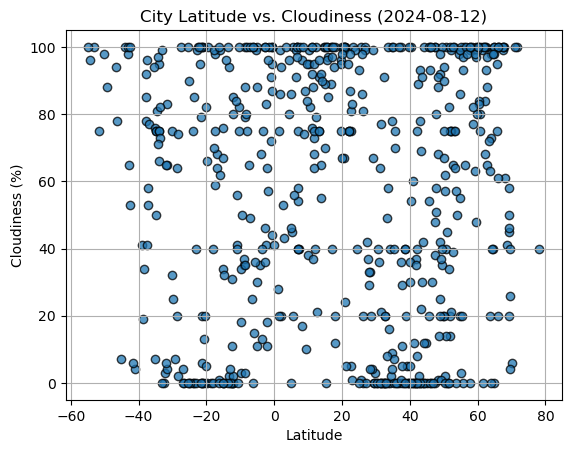

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

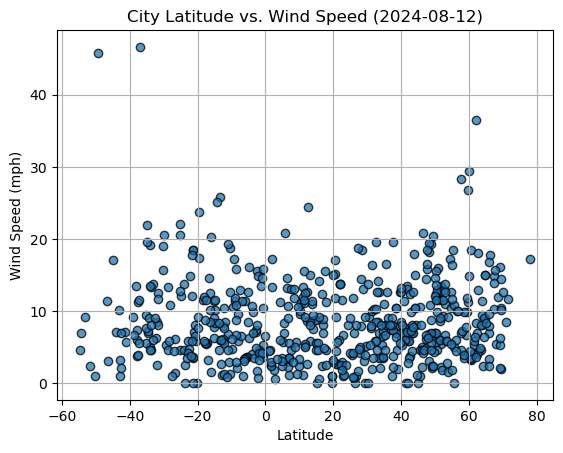

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values),min(y_values)), fontsize=15, color="red")
    plt.title(f"{hemisphere} Hemisphere - {title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gembu,6.7000,11.2667,64.63,95,100,3.09,NG,1723461810
1,yellowknife,62.4560,-114.3525,68.41,74,100,6.91,CA,1723461811
4,bilibino,68.0546,166.4372,47.91,76,61,5.37,RU,1723461815
9,kailua-kona,19.6406,-155.9956,74.28,87,96,1.01,US,1723461820
14,udachny,66.4167,112.4000,53.83,65,100,17.81,RU,1723461825


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,59.34,57,95,19.08,AU,1723461813
3,darwin,-12.4611,130.8418,76.98,61,0,5.75,AU,1723461814
5,blackmans bay,-43.0167,147.3167,47.73,81,98,1.01,AU,1723461816
6,whakatane,-37.9585,176.9854,49.51,81,78,5.99,NZ,1723461817
7,invercargill,-46.4000,168.3500,46.02,74,78,3.00,NZ,1723461818


###  Temperature vs. Latitude Linear Regression Plot

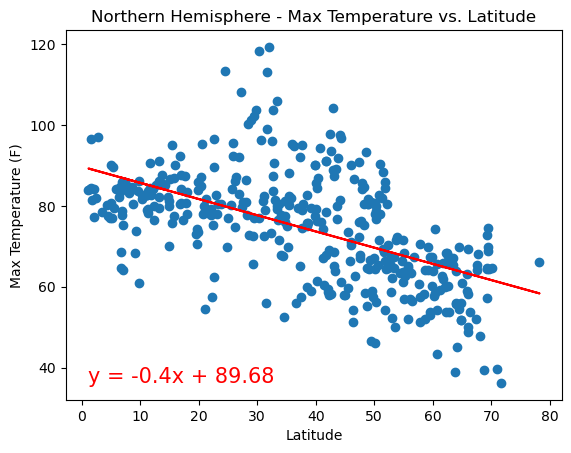

The r-squared is: 0.31494996533994085


In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Max Temperature vs. Latitude", "Latitude", "Max Temperature (F)", "Northern")

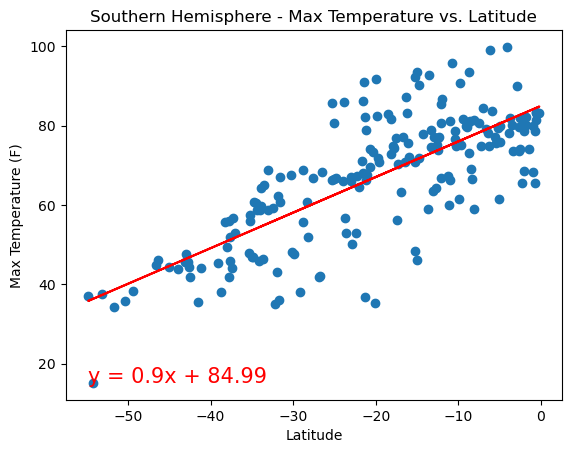

The r-squared is: 0.5764340136745286


In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Max Temperature vs. Latitude", "Latitude", "Max Temperature (F)", "Southern")

**Discussion about the linear relationship:** 
- Negative Slope in the Northern Hemisphere: The negative slope indicates that higher latitudes are associated with cooler temperatures.
- Positive Slope in the Southern Hemisphere: The positive slope indicates that as you approach the equator from the Southern Hemisphere, temperatures increase..

### Humidity vs. Latitude Linear Regression Plot

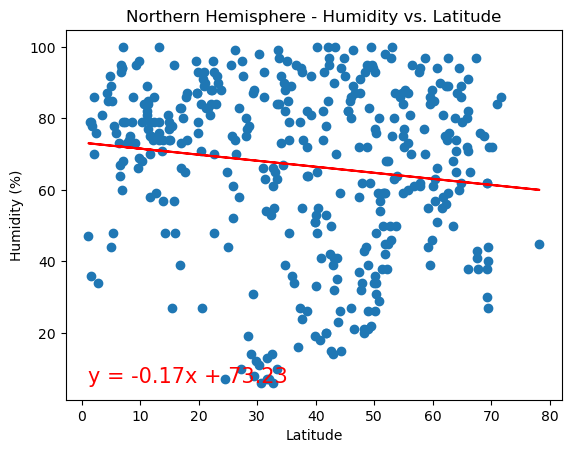

The r-squared is: 0.018620556808468334


In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern")

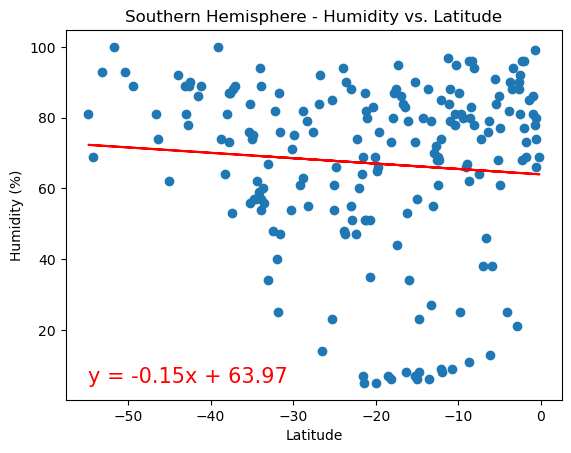

The r-squared is: 0.007032491941030393


In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern")

**Discussion about the linear relationship:**
- The relationship between humidity and latitude is weaker than temperature, with no clear trend in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

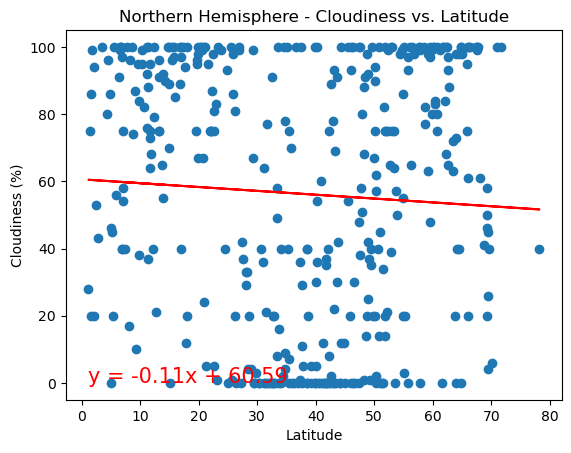

The r-squared is: 0.0033355745802639268


In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern")

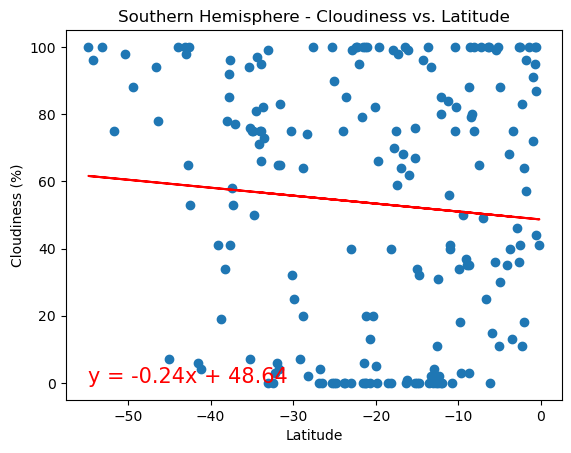

The r-squared is: 0.007211270799476318


In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern")

**Discussion about the linear relationship:**
- Weak Correlation: There is a very weak relationship between latitude and cloudiness in both hemispheres, meaning latitude doesn't significantly influence cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

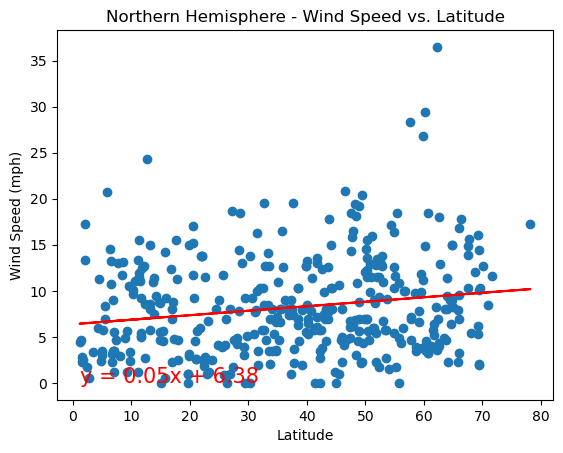

The r-squared is: 0.030723279416570767


In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Northern")

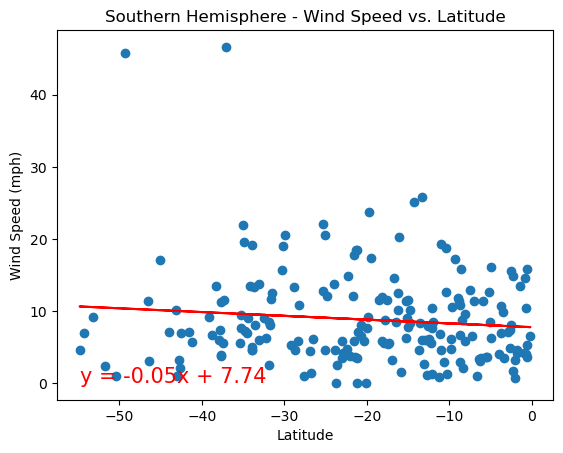

The r-squared is: 0.011577018005366537


In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Southern")

**Discussion about the linear relationship:** 
- Very Weak Correlation: Latitude has almost no impact on wind speed in both hemispheres.
- Flat Slope: The almost flat regression lines indicate a minimal relationship between latitude and wind speed.